In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv("data/test.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [9]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Length: 8693, dtype: bool

## Missing values 
our data seems to have some missing values , now we should analyze the missing values and input appropriate values

In [10]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
def percentage(df):

    percentage = (df.isna().sum() / len(df)) * 100
    return percentage


In [12]:
print(percentage(df_train))

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


we can use this for plotting the missing values percetage wise , from the above observation it seems that Cryosleep seems to have the highest number of missing values . Now i would like to fill the categorial columns with the mode values and the numerical columns with median as median is unaffected against outliers


In [13]:
def fillMedian(df):
# Creating a method to iterate overcolumns and if the dtype is not object then we would we will the na values with median of that column
    for i in df.columns :
        if df[i].dtype != 'object' :
            df[i].fillna(df[i].median(),inplace = True)

    return df


In [14]:
def fillMode(df):
    
    for i in df.columns:
        if df[i].dtype == 'object' :
            df[i].fillna(df[i].mode()[0],inplace = True)
    
    return df

In [15]:
df_train = fillMedian(df_train)
df_train = fillMode(df_train)
print(df_train.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [16]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Looks like we filled the missing values with the median and mode for numerical columns and catergorial columns respectively .

## Outlier detection and removal 
now we should look at the distribution of columns and 

In [17]:
num = []

for i in df_train.columns:
    if df_train[i].dtype != 'object' and i != 'Transported' and  df_train[i].dtype != 'bool':
        num.append(i)

print(num)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [18]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  ... VRDeck               Name  Transported
0     0001_01     Europa      False  ...    0.0    Maham Ofracculy        False
1     0002_01      Earth      False  ...   44.0       Juanna Vines         True
2     0003_01     Europa      False  ...   49.0      Altark Susent        False
3     0003_02     Europa      False  ...  193.0       Solam Susent        False
4     0004_01      Earth      False  ...    2.0  Willy Santantines         True

[5 rows x 14 columns]


The skewness of the age column is 0.43110235678108527


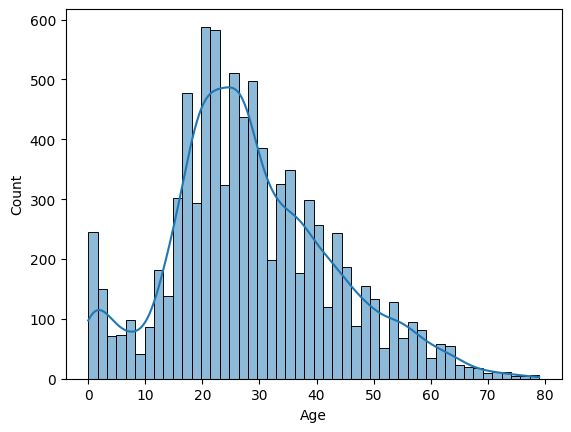

In [19]:

sns.histplot(df_train[num[0]] , x = df_train[num[0]] , kde = True )
print("The skewness of the age column is {}".format(df_train[num[0]].skew()))

In [20]:
print(num)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


The age column is not normally distributed , to remove the outliers we have to use the IQR method

In [21]:
def IQR(df,i):

    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    IQR_max = df[i].quantile(0.75) + 1.5*IQR
    IQR_min = df[i].quantile(0.25) - 1.5*IQR

    return IQR_max , IQR_min

In [22]:
for i in num:

    IQR_max , IQR_min = IQR(df_train,i)
    outliers = df_train[(df_train[i] < IQR_min) | (df_train[i] > IQR_max) ]
    
    print("The column {} had {} outliers".format(i,len(outliers)))

The column Age had 162 outliers
The column RoomService had 1906 outliers
The column FoodCourt had 1916 outliers
The column ShoppingMall had 1879 outliers
The column Spa had 1833 outliers
The column VRDeck had 1849 outliers


In [23]:
IQR = df_train[num[0]].quantile(0.75) - df_train[num[0]].quantile(0.25)
IQR_max = df_train[num[0]].quantile(0.75) + 1.5*IQR
print(IQR_max)

62.5


In [24]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  ... VRDeck               Name  Transported
0     0001_01     Europa      False  ...    0.0    Maham Ofracculy        False
1     0002_01      Earth      False  ...   44.0       Juanna Vines         True
2     0003_01     Europa      False  ...   49.0      Altark Susent        False
3     0003_02     Europa      False  ...  193.0       Solam Susent        False
4     0004_01      Earth      False  ...    2.0  Willy Santantines         True

[5 rows x 14 columns]


In [25]:
df_train = df_train[df_train[num[0]] < IQR_max]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcab580bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcab584c550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcab580bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcab584ca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcab584cd30>],
 'means': []}

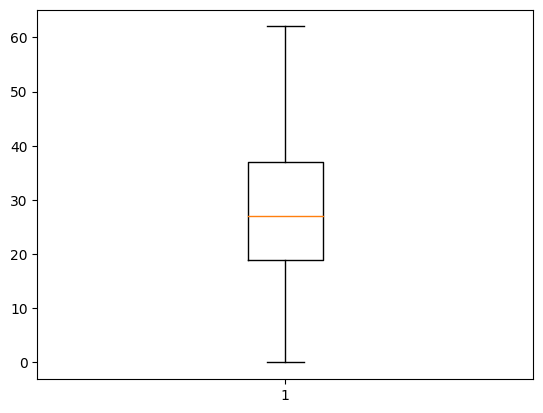

In [26]:
plt.boxplot(df_train[num[0]])

It seems like we removed the outliers for the age column now we should do it for the other numerical columns

In [27]:
for i in range(1,len(num)) :

    print("The {} column has skewness of {}".format(num[i],df_train[num[i]].skew()))

The RoomService column has skewness of 6.452252515554153
The FoodCourt column has skewness of 7.228237828716999
The ShoppingMall column has skewness of 12.74918169236743
The Spa column has skewness of 7.310986777324706
The VRDeck column has skewness of 7.938878744894799


All the above columns seem to be highly skewed , we can use mean standard deviation to remove the outlier so we have to use the IQR method to remove the outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcab588f430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcab588f970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcab7343df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcab588feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcab56d0190>],
 'means': []}

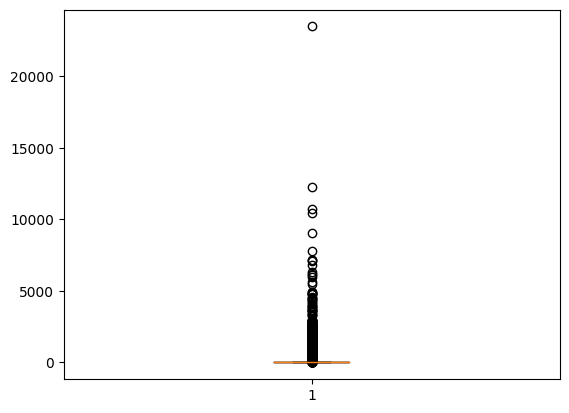

In [28]:
plt.boxplot(df_train[num[3]])

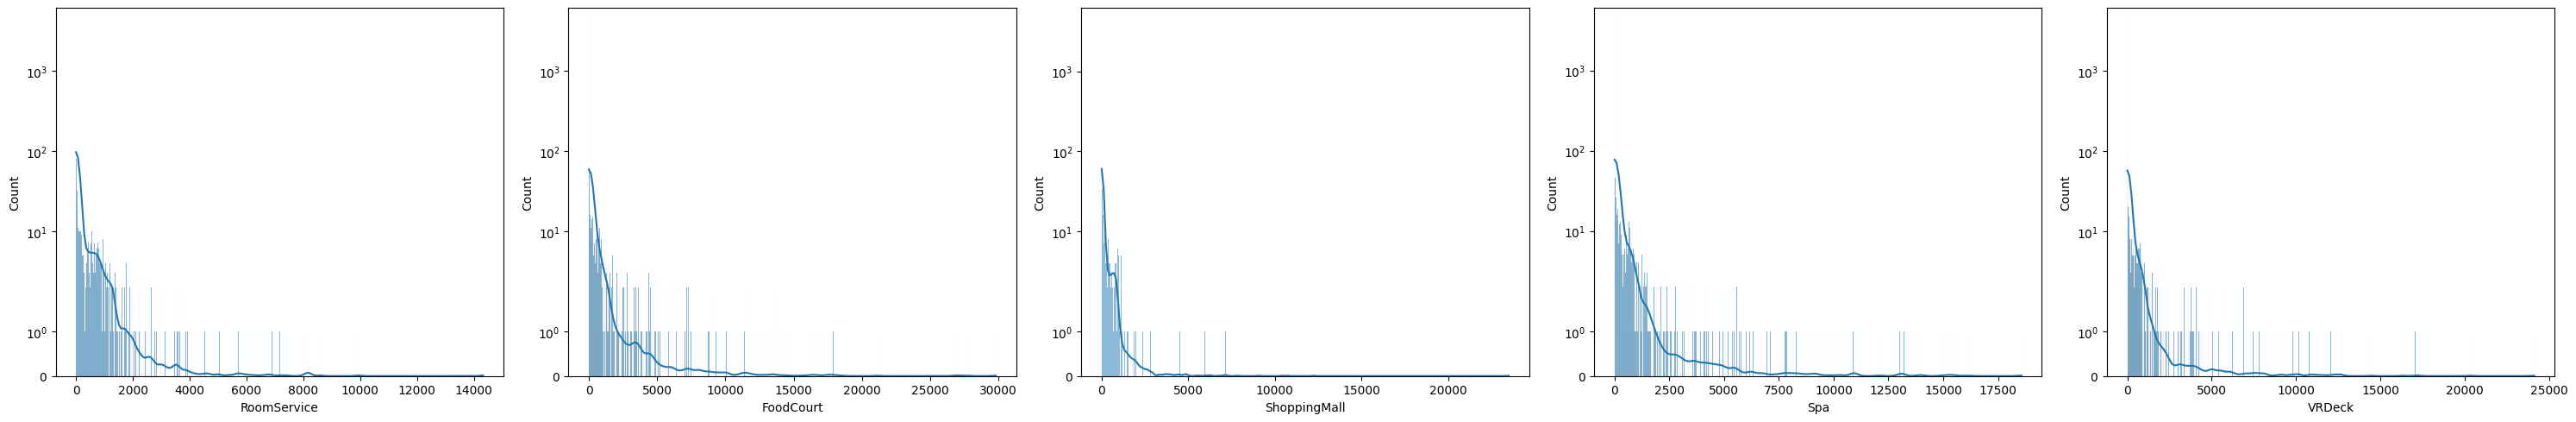

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=len(num) - 1, figsize = (30,5))

sns.histplot(data = df_train, x = num[1] , ax = ax[0] , kde = True)
ax[0].set_xlabel("{}".format(num[1]))
ax[0].set_yscale('symlog')

sns.histplot(data = df_train, x = num[2] , ax = ax[1] , kde = True)
ax[1].set_xlabel("{}".format(num[2]))
ax[1].set_yscale('symlog')

sns.histplot(data = df_train, x = num[3] , ax = ax[2] , kde = True)
ax[2].set_xlabel("{}".format(num[3]))
ax[2].set_yscale('symlog')

sns.histplot(data = df_train, x = num[4] , ax = ax[3] , kde = True)
ax[3].set_xlabel("{}".format(num[4]))
ax[3].set_yscale('symlog')

sns.histplot(data = df_train, x = num[5] , ax = ax[4] , kde = True)
ax[4].set_xlabel("{}".format(num[5]))
ax[4].set_yscale('symlog')

plt.tight_layout()
plt.show()

the other numerical columns seem to have most of there values as 0 , which means huge amount of the didnt spend money during their travel we can combine all the columns  to people who spent money.

In [30]:
spent = df_train[num[1:]]

Spent = spent.sum(axis = 1)

total_spent = spent.sum(axis = 1)

Spent = Spent.apply(lambda x : 0 if x == 0 else 1)

df_train = df_train.join(pd.DataFrame(data = {'Spent' : Spent , 'Total_spent' : total_spent}))

In [31]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Spent           0
Total_spent     0
dtype: int64

([<matplotlib.patches.Wedge at 0x7fcaa18b2c20>,
 [Text(-0.01745463273394463, 1.1998730498665777, 'Transported'),
  Text(0.01745452039372218, -1.1998730515007932, 'Not Transported')],
 [Text(-0.010181869094801031, 0.6999259457555037, '50.5%'),
  Text(0.010181803563004606, -0.699925946708796, '49.5%')])

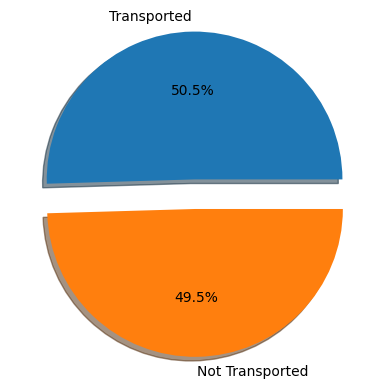

In [32]:
transported = df_train[df_train['Transported'] == 1]
not_transported = df_train[df_train['Transported'] == 0]
plt.pie([len(transported),len(not_transported)] , explode=[0.10,0.10] , shadow= True , labels=('Transported','Not Transported') , autopct='%1.1f%%')

Text(0.5, 1.0, 'Percentage of people opting for VIP')

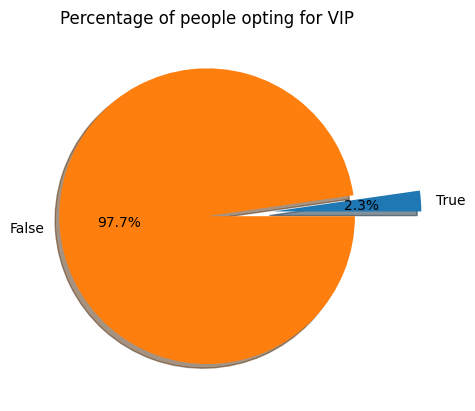

In [33]:
#Looking at the VIP column
true = df_train.VIP.value_counts().loc[True]
false = df_train.VIP.value_counts().loc[False]
plt.pie([true,false] , explode = [0.45,0.0] , shadow=True , labels = ['True','False'] , autopct='%1.1f%%')
plt.title("Percentage of people opting for VIP")

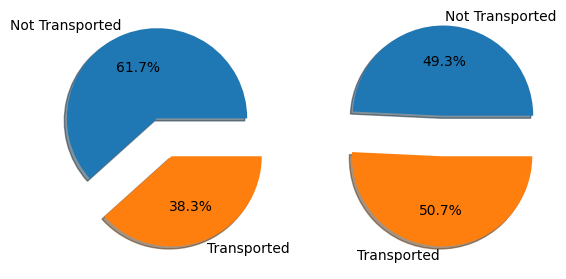

In [34]:
#People who got transported among VIP

fig , ax = plt.subplots(ncols=2 , nrows= 1)

temp = df_train[['VIP','Transported']]
false_transported = temp.groupby(['VIP']).sum().loc[False]
true_transported = temp.groupby(['VIP']).sum().loc[True]
true_not_tranported = true - true_transported
false_not_transported = false - false_transported

ax[0].pie([true_not_tranported[0],true_transported[0]] , labels = ['Not Transported','Transported'] ,explode = [0.45,0.0] , shadow=True , autopct='%1.1f%%' )
ax[0].set_label("VIPs")

ax[1].pie([false_not_transported[0],false_transported[0]] , labels = ['Not Transported','Transported'] ,explode = [0.45,0.0] , shadow=True , autopct='%1.1f%%' )
ax[1].set_label("Non - VIPs")

So , being a Non-VIP had higher odds od being transported to the correct positon

In [35]:
#Taking a look at the cabin column
deck = df_train['Cabin'].apply(lambda x : str(x).split('/')[0])
num = df_train['Cabin'].apply(lambda x : str(x).split('/')[1] if len(str(x).split('/')) > 1 else ' ') 
side = df_train['Cabin'].apply(lambda x : str(x).split('/')[2] if len(str(x).split('/')) > 2 else ' ')

In [36]:
print(deck.value_counts())
deck.replace(to_replace='nan' , value = deck.mode().loc[0] , inplace  = True)
print("The number of unique values is {}".format(deck.nunique()))

Cabin
F    2749
G    2709
E     862
B     761
C     728
D     468
A     249
T       5
Name: count, dtype: int64
The number of unique values is 8


In [37]:
#The num data has too many unique values
print("The number of unique values in num is {}".format(num.nunique()))
num.replace(to_replace=" " , value = num.mode().loc[0],inplace=True)
print(num.value_counts())
print("Max cabin number {}".format(num.max()))
print("Min cabin number is {}".format(num.min()))

The number of unique values in num is 1815
Cabin
734     202
82       27
19       21
86       21
97       21
       ... 
1639      1
1277      1
1638      1
1636      1
1894      1
Name: count, Length: 1815, dtype: int64
Max cabin number 999
Min cabin number is 0


In [38]:
#0-400 , group 1 
#401 - 800 group 2 
#801 - 1200 group 3 
#1201 - 1600 group 4 
#1601 - group 4

df_train['Cabin_group'] = num.astype(np.int32).apply(lambda x : 1 if 0 <= x <= 400 else (2 if 401 <= x <= 800 else (3 if 801 <= x <= 1200 else (4 if 1201 <= x <= 1600 else 5))))
print(df_train['Cabin_group'][:5])

0    1
1    1
2    1
3    1
4    1
Name: Cabin_group, dtype: int64


<Axes: xlabel='Cabin_group', ylabel='count'>

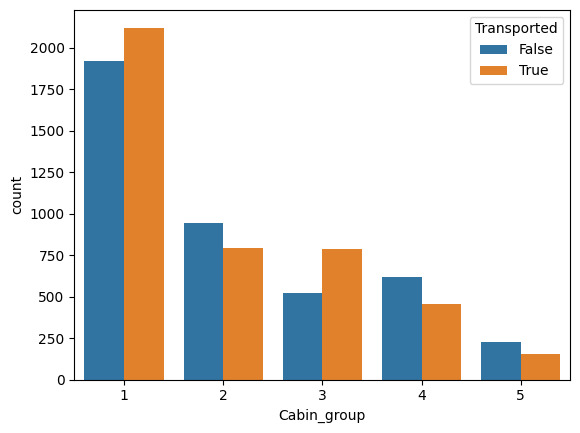

In [39]:
sns.countplot(data = df_train , x = 'Cabin_group' , hue = 'Transported')

In [40]:
print("The number of unique values in num is {}".format(side.nunique()))
side.replace(to_replace=" " , value = side.mode().loc[0],inplace=True)
print(side.value_counts())

The number of unique values in num is 2
Cabin
S    4401
P    4130
Name: count, dtype: int64


<Axes: xlabel='Cabin', ylabel='Count'>

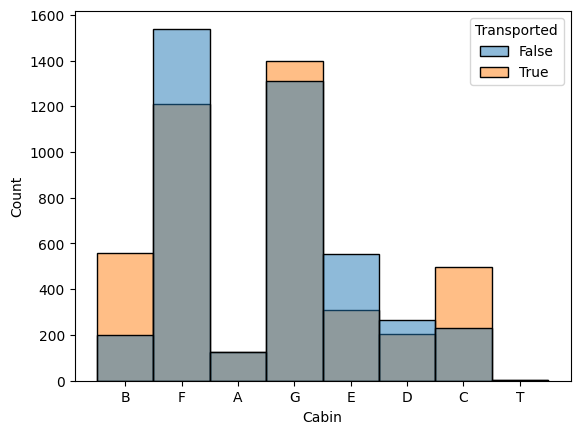

In [41]:
sns.histplot(data = deck , x = deck ,hue = df_train.Transported)

<Axes: xlabel='Cabin', ylabel='Count'>

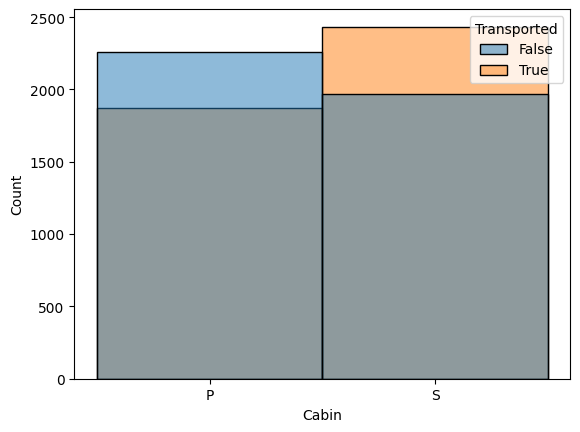

In [42]:
sns.histplot(data = side , x = side , hue = df_train.Transported)

People from Cabin S had higher chance of being transported 

In [43]:
df_train = pd.concat([df_train,pd.DataFrame(data={"Side" : side}), pd.DataFrame(data = {"Deck" : deck})], axis=1)
df_train.drop(columns = ['PassengerId','Cabin'],axis=1,inplace = True)
print(df_train.head())


  HomePlanet  CryoSleep  Destination   Age  ...  Total_spent  Cabin_group  Side  Deck
0     Europa      False  TRAPPIST-1e  39.0  ...          0.0            1     P     B
1      Earth      False  TRAPPIST-1e  24.0  ...        736.0            1     S     F
2     Europa      False  TRAPPIST-1e  58.0  ...      10383.0            1     S     A
3     Europa      False  TRAPPIST-1e  33.0  ...       5176.0            1     S     A
4      Earth      False  TRAPPIST-1e  16.0  ...       1091.0            1     S     F

[5 rows x 17 columns]


<Axes: xlabel='CryoSleep', ylabel='Count'>

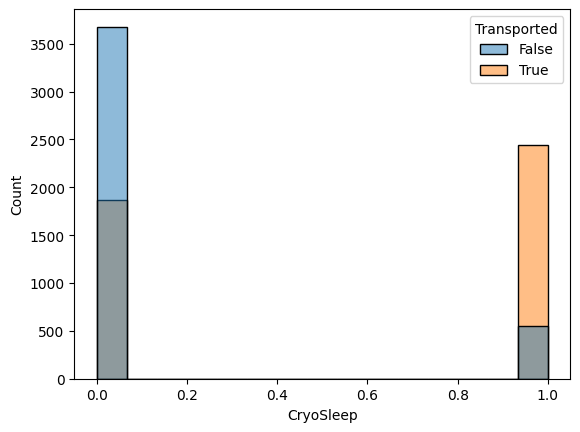

In [44]:
#People who opted for cryo sleep 
sns.histplot(data = df_train , x = df_train.CryoSleep.astype(np.int32) , hue = df_train.Transported)


In [45]:
temp = df_train[['Transported' , 'CryoSleep']]
false_transported = temp.groupby(['CryoSleep']).sum().loc[False][0]
true_transported = temp.groupby(['CryoSleep']).sum().loc[True][0]
false_total = temp.CryoSleep.value_counts().loc[False]
true_total = temp.CryoSleep.value_counts().loc[True]


In [46]:
print("Percentage of people that opted for cryosleep and Got transported {}".format((true_transported / true_total) * 100))
print("Percentage of people that opted for cryosleep and Got transported {}".format((false_transported / false_total) * 100))

Percentage of people that opted for cryosleep and Got transported 81.653833277536
Percentage of people that opted for cryosleep and Got transported 33.65800865800866


So people who opted for cryosleep had much higher chance of being transported to correct location 

<Axes: xlabel='HomePlanet', ylabel='Count'>

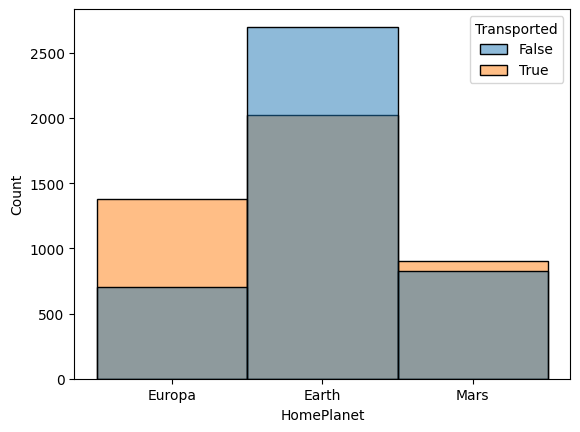

In [47]:
#Taking a look at homeplanet column
sns.histplot(data = df_train , x = df_train['HomePlanet'] , hue = 'Transported')

In [48]:
europa = df_train['HomePlanet'][df_train['HomePlanet'] == 'Europa']
earth = df_train['HomePlanet'][df_train['HomePlanet'] == 'Earth']
mars = df_train['HomePlanet'][df_train['HomePlanet'] == 'Mars']
temp = df_train[['HomePlanet','Transported']]
print("The percentage ")
print(temp.groupby(['HomePlanet']).sum())

The percentage 
            Transported
HomePlanet             
Earth              2025
Europa             1376
Mars                904


In [49]:
#Creating age groups from the Age column
#If age is between 0 - 18 group1
#19-30 - group 2 
#30-45 - group 3 
#45+ - group 4 

df_train['Age_group'] = df_train['Age'].apply(lambda x: 1 if 0 <= x <= 18 else (2 if 19 <= x <= 30 else (3 if 31 <= x <= 45 else 4)))
print(df_train.Age_group)

0       3
1       2
2       4
3       3
4       1
       ..
8688    3
8689    1
8690    2
8691    3
8692    3
Name: Age_group, Length: 8531, dtype: int64


<Axes: xlabel='Age_group', ylabel='count'>

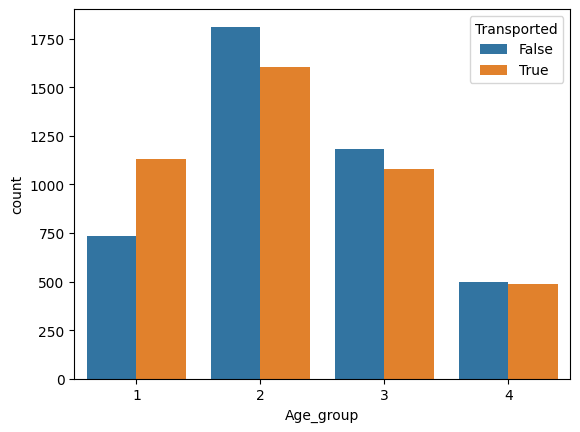

In [50]:
sns.countplot(data = df_train , x = 'Age_group' , hue = 'Transported')

We had the maximum people from 2nd group , Also being from the group 1 had high chance of being transported.

In [51]:
#Taking a look at the name column 

print(df_train['Name'][:5])

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object


In [52]:
first_name = df_train['Name'].apply(lambda x : str(x).split(" ")[0])
print(first_name)

0         Maham
1        Juanna
2        Altark
3         Solam
4         Willy
         ...   
8688    Gravior
8689      Kurta
8690      Fayey
8691     Celeon
8692     Propsh
Name: Name, Length: 8531, dtype: object


In [53]:
print(first_name.nunique())
print(first_name.value_counts())

2689
Name
Alraium    198
Idace       13
Loree       11
Glena       11
Dandra      11
          ... 
Shabih       1
Pyrohs       1
Ray          1
Crowls       1
Chain        1
Name: count, Length: 2689, dtype: int64


In [54]:
sur_name = df_train['Name'].apply(lambda x : str(x).split(" ")[1])
print(sur_name)

0         Ofracculy
1             Vines
2            Susent
3            Susent
4       Santantines
           ...     
8688      Noxnuther
8689      Mondalley
8690         Connon
8691      Hontichre
8692      Hontichre
Name: Name, Length: 8531, dtype: object


In [55]:
print(sur_name.nunique())

2213


<Axes: >

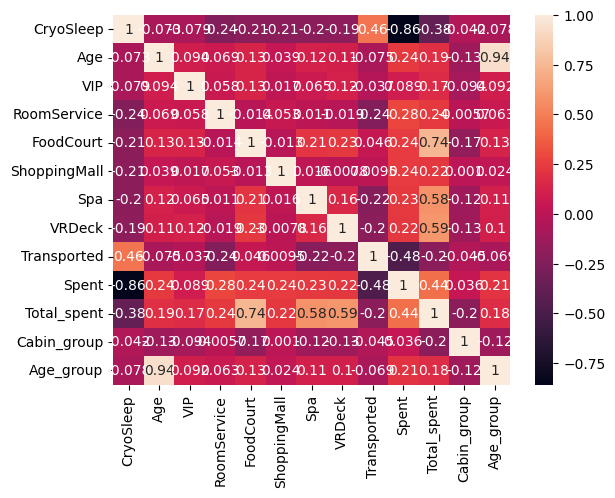

In [56]:
#Correlation among features 
feat = []
for i in df_train.columns :
    if df_train[i].dtype != 'object':
        feat.append(i)
df_train[feat] = df_train[feat].astype(np.float32)
sns.heatmap(data = df_train[feat].corr() , annot=True )

In [57]:
#total_spent has better relations with transported and other columns compared to spent
df_train.drop(columns = 'Spent' , axis = 1 , inplace = True)

## Categorial Features

In [58]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_spent,Cabin_group,Side,Deck,Age_group
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0.0,1.0,P,B,3.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,736.0,1.0,S,F,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,10383.0,1.0,S,A,4.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,5176.0,1.0,S,A,3.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1091.0,1.0,S,F,1.0


In [59]:
df_train.drop(columns='Name' ,axis = 1 , inplace = True)

In [60]:
df_train.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spent,Cabin_group,Side,Deck,Age_group
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,P,B,3.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,736.0,1.0,S,F,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,10383.0,1.0,S,A,4.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,5176.0,1.0,S,A,3.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1091.0,1.0,S,F,1.0


In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

col = ColumnTransformer(
    transformers=[
        ("transformer", OneHotEncoder(), ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']),
        #("scalar" , RobustScaler() , ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"] )
    ],
    remainder="passthrough",
    n_jobs=-1
)

col.fit(df_train)
df_train = col.transform(df_train)


In [62]:
print(df_train[:5,:])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 3.9000e+01 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 2.4000e+01 1.0900e+02 9.0000e+00 2.5000e+01
  5.4900e+02 4.4000e+01 1.0000e+00 7.3600e+02 1.0000e+00 2.0000e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 5.8000e+01 4.3000e+01 3.5760e+03 0.0000e+00
  6.7150e+03 4.9000e+01 0.0000e+00 1.0383e+04 

## Modelling


In [63]:
X = np.concatenate((df_train[:,:-4] , df_train[:,-3:]) , axis = 1)

In [64]:
print(X[:5,:])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 3.9000e+01 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 2.4000e+01 1.0900e+02 9.0000e+00 2.5000e+01
  5.4900e+02 4.4000e+01 7.3600e+02 1.0000e+00 2.0000e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 5.8000e+01 4.3000e+01 3.5760e+03 0.0000e+00
  6.7150e+03 4.9000e+01 1.0383e+04 1.0000e+00 4.0000e+00]
 [0.0000e+

In [65]:
y = df_train[:,-4].astype(np.float32)
print(y[:5])

[0. 1. 0. 0. 1.]


In [66]:
from sklearn.model_selection import train_test_split
X_train ,X_valid , y_train , y_valid = train_test_split(X , y , random_state=69 , test_size=0.2)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

models = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "CAT" : CatBoostClassifier(),
    "XGB" : XGBClassifier()

}
model_train_scores = []
model_valid_scores = []
model_names = []

for name , model in models.items() :
    model_names.append(name)
    model.fit(X_train,y_train)
    model_train_scores.append(model.score(X_train,y_train))
    model_valid_scores.append(model.score(X_valid,y_valid))



<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


Learning rate set to 0.023392
0:	learn: 0.6835933	total: 48.5ms	remaining: 48.5s
1:	learn: 0.6734618	total: 51.5ms	remaining: 25.7s
2:	learn: 0.6633262	total: 53.3ms	remaining: 17.7s
3:	learn: 0.6526345	total: 55.2ms	remaining: 13.7s
4:	learn: 0.6431838	total: 57.1ms	remaining: 11.4s
5:	learn: 0.6343353	total: 59ms	remaining: 9.77s
6:	learn: 0.6257208	total: 60.8ms	remaining: 8.62s
7:	learn: 0.6180147	total: 62.9ms	remaining: 7.8s
8:	learn: 0.6100840	total: 64.8ms	remaining: 7.13s
9:	learn: 0.6041868	total: 67.1ms	remaining: 6.64s
10:	learn: 0.5966033	total: 68.9ms	remaining: 6.2s
11:	learn: 0.5891377	total: 71.4ms	remaining: 5.88s
12:	learn: 0.5830618	total: 73.2ms	remaining: 5.56s
13:	learn: 0.5778059	total: 75.3ms	remaining: 5.3s
14:	learn: 0.5728169	total: 77.2ms	remaining: 5.07s
15:	learn: 0.5669352	total: 79.2ms	remaining: 4.87s
16:	learn: 0.5620495	total: 81.5ms	remaining: 4.71s
17:	learn: 0.5558324	total: 83.3ms	remaining: 4.55s
18:	learn: 0.5513685	total: 85.3ms	remaining: 4.4

In [68]:
print(model_names)
print(model_train_scores)
print(model_valid_scores)

['RF', 'DT', 'CAT', 'XGB']
[0.9718640093786636, 0.9718640093786636, 0.8779308323563892, 0.9251172332942555]
[0.7855887521968365, 0.7457527826596367, 0.7978910369068541, 0.7967193907439953]


In [69]:
#Dealing with Catboost

# param_grid = {
#     "iterations": [500,1000,1500],
#     "learning_rate" : [0.01,0.009,0.03,0.1],
#     "eval_metric" : ['Accuracy'],
#      "depth" : [4,6,8,10]
    
# }

# grid = GridSearchCV(CatBoostClassifier() , param_grid=param_grid , n_jobs=4 , scoring='accuracy' , verbose = 0)

# grid.fit(X_train,y_train)

In [70]:
# from sklearn.metrics import accuracy_score
# print(grid.best_score_)
# print("The valid accuracy {}".format(accuracy_score(y_valid , grid.predict(X_valid)) ))
# print(grid.best_params_)
# best_params = grid.best_params_

In [71]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_train,grid.predict(X_train))

In [72]:

# cat = CatBoostClassifier(**best_params,random_state=69,verbose=0,l2_leaf_reg=7.0).fit(X_train,y_train)
# print("Training score : {}".format(cat.score(X_train,y_train)))
# print("Test accuracy : {}".format(cat.score(X_valid,y_valid)))
# string = str(cat.score(X_train,y_train)) + (str(cat.score(X_valid,y_valid)))
# file = open("file.txt","w+")
# file.write(string)
# file.close()

In [115]:
#trying on Xgboost 
param_grid = {
    "n_estimators": [100,150,200],
    "max_depth": [4,6,8],
    "learning_rate": [0.1,0.15,0.175],
    

}
grid = GridSearchCV(XGBClassifier(),param_grid=param_grid,n_jobs=4).fit(X_train,y_train)

In [119]:
print(grid.best_score_)
print(grid.best_params_)

0.8163826496084561
{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150}


In [159]:

xg = XGBClassifier(**grid.best_params_,reg_lambda = 0.03 ,).fit(X_train,y_train)
print("The training score is {}".format(xg.score(X_train,y_train)))
print("The test score is {}".format(xg.score(X_valid,y_valid)))

The training score is 0.8656213364595545
The test score is 0.8025776215582894
